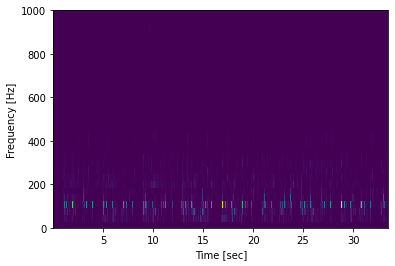

In [1]:
from masking_analysis.sound import Sound
s = Sound.sound_from_wav("/home/kanecunningham/PycharmProjects/pinniped_lab/test_data/sample.wav")
s.plot_spectrogram()

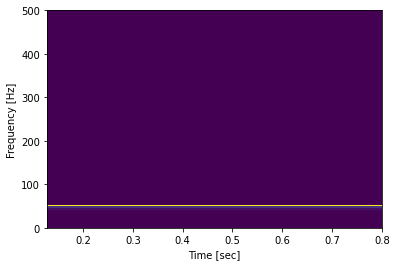

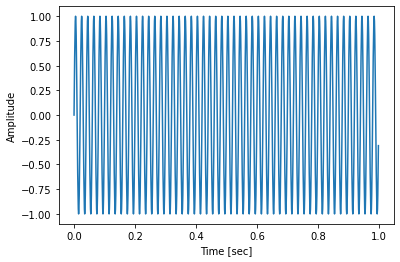

In [3]:
from masking_analysis.sound import Sound
from masking_analysis.protos import sound_pb2, sound_generation_pb2

sound_gen_config = sound_generation_pb2.SoundGenConfig()
sound_gen_config.fs = 1000
sound_gen_config.duration = 1
sound_gen_config.pure_tone_config.center_freq = 50
sound = Sound.sound_from_gen_config(sound_gen_config)
sound.plot_spectrogram()
sound.plot_time_series()

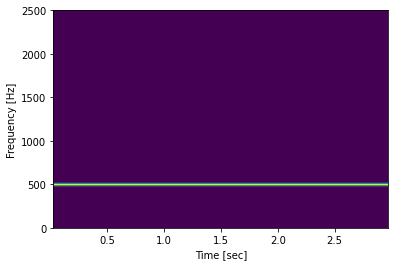

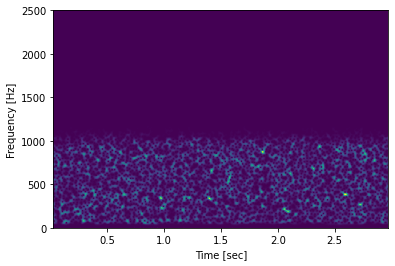

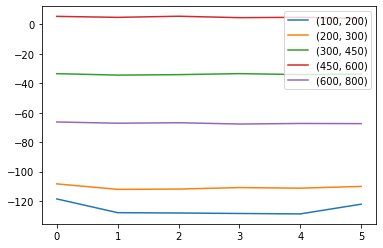

In [4]:
from masking_analysis.sound import Sound, MaskingAnalyzer
from masking_analysis.protos import sound_pb2, sound_generation_pb2, masking_config_pb2
import matplotlib.pyplot as plt
from scipy import signal

signal_gen_config = sound_generation_pb2.SoundGenConfig()
signal_gen_config.fs = 5000
signal_gen_config.duration = 3
signal_gen_config.pure_tone_config.center_freq = 500
signal = Sound.sound_from_gen_config(signal_gen_config)

noise_gen_config = sound_generation_pb2.SoundGenConfig()
noise_gen_config.fs = 5000
noise_gen_config.duration = 3
noise_gen_config.flat_spectrum_noise_config.start_freq = 50
noise_gen_config.flat_spectrum_noise_config.stop_freq = 1000
noise_gen_config.flat_spectrum_noise_config.filter_order = 10
noise = Sound.sound_from_gen_config(noise_gen_config)

masking_config = masking_config_pb2.MaskingConfig()
band_config = masking_config.auditory_band_config
for start, stop in [(100, 200), (200, 300), (300, 450), (450, 600), (600, 800)]:
  band = band_config.auditory_bands.add()
  band.start_freq = start
  band.stop_freq = stop
  band.critical_ratio = 5
band_config.filter_order = 10
masking_config.window_duration_ms = 500
masking_config.window_step_ms = 500


signal = Sound.sound_from_gen_config(signal_gen_config)
noise = Sound.sound_from_gen_config(noise_gen_config)

signal.plot_spectrogram(window=('hamming'), nfft=1024, nperseg=256, noverlap=240)
noise.plot_spectrogram(window=('hamming'), nfft=1024, nperseg=256, noverlap=240)

analyzer = MaskingAnalyzer(signal, noise, masking_config)
se = analyzer.get_signal_excess()

# spls, signals = sound.get_windowed_spl_by_bands([(20, 100), (100, 200), (200, 400)], 10, 100, 50)
# for band, spl in spls.items():
#     plt.plot([x[0] for x in spl[1]], spl[0], label=str(band))
# plt.legend(loc='lower right')

for band, excess in se.items():
    plt.plot(excess, label=str(band))
plt.legend(loc='upper right')
